### House Prices Predictions:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [56]:
#read data
train = pd.read_csv('./train.csv') 
test  = pd.read_csv('./test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train_numeric = train.select_dtypes(exclude=['object'])

In [6]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [7]:
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
#Data Cleaning
train_numeric = train_numeric.dropna()
train_numeric.isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [9]:
print(train_numeric.shape)

(1121, 38)


### Analysis

In [20]:
train_num = train.select_dtypes(exclude=['object'])

In [21]:
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [22]:
del train_num['Id']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C24AD02E80>,
      dtype=object)

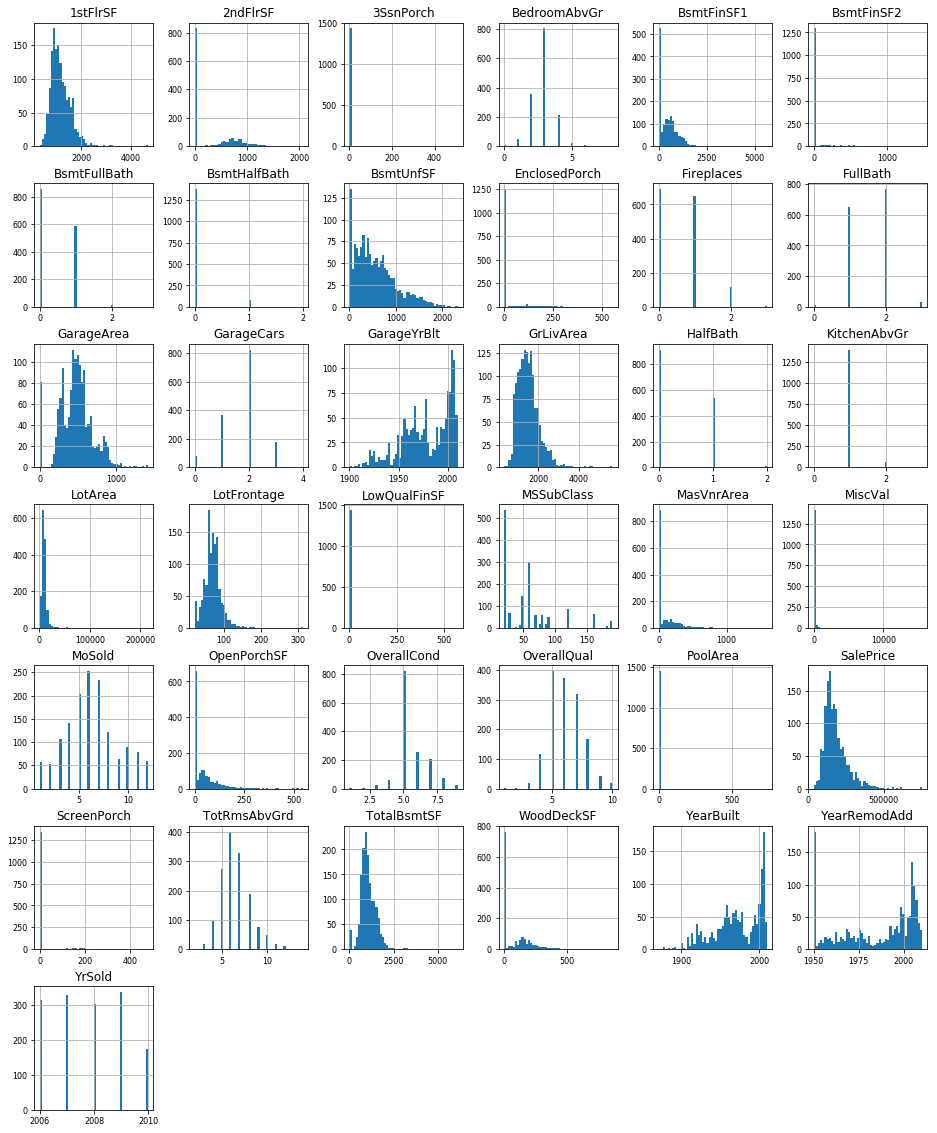

In [23]:
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

The feature with the same distribution of 'SalePrice' are : `'TotalBsmtSF', 'LotFrontage', 'GarageArea', 'GrLivArea', 'LotArea', 'BsmtFinSF1', 'lstFlrSF' `

In [24]:
#Correlations
train_num_corr = train_num.corr()['SalePrice']
features_list_corr =  train_num_corr[abs(train_num_corr) > 0.5].sort_values(ascending=False)

In [25]:
features_list_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [26]:
features_analysis_list = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']

### Edit  Data

In [27]:
print(train_num.shape)
train_num = train_num.dropna()

(1460, 37)


In [28]:
print(train_num.shape)

(1121, 37)


In [29]:
X = train_num[features_analysis_list]
Y = train_num['SalePrice']

### Build Model

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [31]:
Xnp = np.array(X)
Ynp = np.array(Y)

In [35]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, Xnp, Ynp, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [36]:
model2 =  linear_model.LinearRegression()
cross_validation_rmse = rmse_cv(model2).mean()

In [37]:
print('The mean of the cross validatoin error is: {}'.format(cross_validation_rmse))

The mean of the cross validatoin error is: 42123.28095369206


### Rigde Regression Model

In [38]:
from sklearn.linear_model import Ridge

In [39]:
model2 =  Ridge()
cross_validation_rmse2 = rmse_cv(model2).mean()
print('The mean of the cross validatoin error for Rigde model is: {}'.format(cross_validation_rmse2))

The mean of the cross validatoin error for Rigde model is: 42119.49530968955


### Test Data

In [40]:
del test['Id']

In [41]:
X_test = test[features_analysis_list]

In [42]:
X_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
0,5,896,1.0,730.0,882.0,896,1,5
1,6,1329,1.0,312.0,1329.0,1329,1,6
2,5,1629,2.0,482.0,928.0,928,2,6
3,6,1604,2.0,470.0,926.0,926,2,7
4,8,1280,2.0,506.0,1280.0,1280,2,5


In [43]:
print(X_test.shape)

(1459, 8)


In [46]:
X_test_mod = X_test.fillna(X_test.mean())

In [47]:
X_test_mod.isnull().any()

OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
dtype: bool

In [48]:
X_test_np = np.array(X_test_mod)

### XGBoost Model

In [49]:
import xgboost as xgb

In [50]:
dtrain = xgb.DMatrix(Xnp, Ynp)
dtest = xgb.DMatrix(X_test_np)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned node

[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned node

[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned node

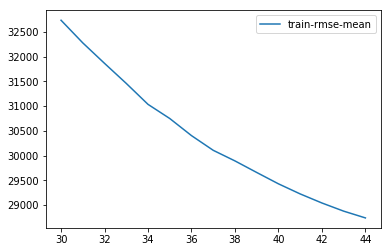

In [51]:
model.loc[30:,["train-rmse-mean"]].plot()

#### Training

In [52]:
model_xgb_Reg = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
model_xgb_Reg.fit(Xnp, Ynp)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
### XGBoost
xgb_Reg_preds = model_xgb_Reg.predict(X_test_np)

In [54]:
print(xgb_Reg_preds)

[134425.89 156943.75 155686.23 ... 146949.2   95045.04 220067.78]


In [57]:
sol2 = pd.DataFrame({"id":test.Id, "SalePrice": xgb_Reg_preds})
sol2.to_csv("xgb_preds_.csv", index = False)